<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/MonteCarlo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient descent

Example taken from the bok "The hundred page of machine learning"

The spending of various companies on radio advertising each year and their annual sales in terms of units sold

The linear regression model $f(x)=\omega x+b$, need to find values of $\omega$ and $b$ from data. We are looking for values for $\omega$ and $b$ that minimize the mean squared error (or the loss function):

$l=\frac{1}{N} \Sigma_{i=1}^N [y_i - (\omega x_i+b)]^2$

Gradient descent starts with calculating the partial derivative for every parameter:

$\frac{\partial l}{\partial \omega} = \frac{1}{N} \Sigma_{i=1}^N -2x_i [y_i-(\omega x_i+b)]$

$\frac{\partial l}{\partial b} = \frac{1}{N} \Sigma_{i=1}^N -2 [y_i-(\omega x_i+b)]$

Gradient descent proceeds in epochs. An epoch consists of using the training set entirely to update each parameter. In the beginning, the first epoch, we initialize $\omega \leftarrow 0$ and $b \leftarrow 0$. The partial derivatives, 
$\frac{\partial l}{\partial \omega}$ and 
$\frac{\partial l}{\partial b}$ equal, respectively, $-\frac{2}{N} \Sigma_{i=1}^N x_i y_i$ and $-\frac{2}{N} \Sigma_{i=1}^N y_i$. At each epoch, we update $\omega$ and $b$ using partial derivatives. The learning rate $\alpha$ controls the size of an update:

$\omega \leftarrow \omega - \alpha \frac{\partial l}{\partial \omega}$;

$b \leftarrow b - \alpha \frac{\partial l}{\partial b}$.

We subtract (as opposed t adding) partial derivatives from the values of parameters because derivatives are indicators of growth of a function. If a derivative is positive at some point, then the function grows at this point. Because we want to minimize the objective function, when the derivative is positive we know that we need to move our parameter in the opposite
direction (to the left on the axis of coordinates). When the derivative is negative (function is decreasing), we need to move our parameter to the right to decrease the value of the function even more. Subtracting a negative value from a parameter moves it to the right.

At the next epoch, we recalculate partial derivatives with the updated values of w and b; we continue the process until convergence. Typically, we need many epochs until we start seeing that the values for $\omega$ and $b$ don’t change much after each epoch; then we stop.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


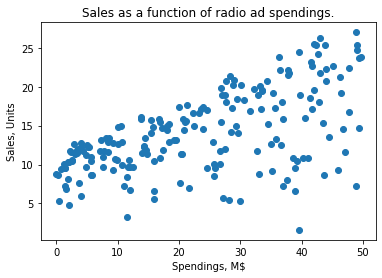

epoch:  0 loss: 92.32078294903626
w, b:  0.7412639000000002 0.028045000000000007


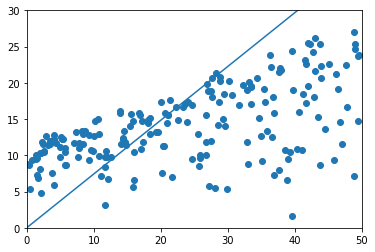

epoch:  400 loss: 33.79131790081576
w, b:  0.4282720349432519 1.933428695950039


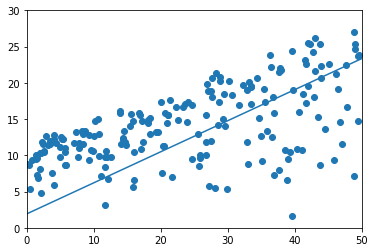

epoch:  800 loss: 27.9918542960729
w, b:  0.38178288442481695 3.4526614981614254


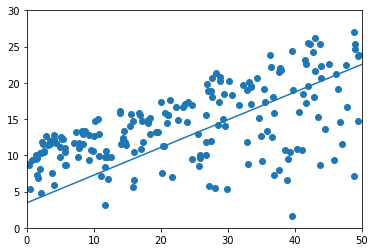

epoch:  1200 loss: 24.33481690722147
w, b:  0.34486622481754114 4.659072017562193


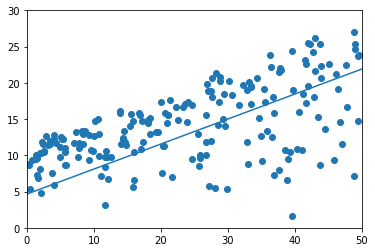

epoch:  1600 loss: 22.028754937538633
w, b:  0.31555100306447775 5.617072884316986


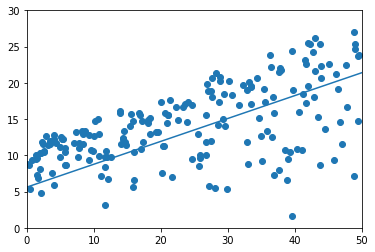

epoch:  3000 loss: 18.876170218021276
w, b:  0.2529431349721907 7.663054061034952


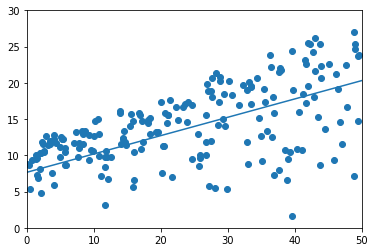

epoch:  6000 loss: 18.117072440822145
w, b:  0.21144673626951038 9.019127238963959


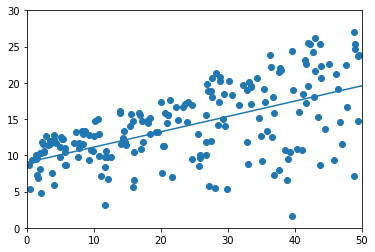

13.953659766788046


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

''' mount your google drive to google colab'''
drive.mount('/content/drive/')
'''since the code will be run on a virtual machine, we need to copy the python file to that machine in order to run it'''
!cp /content/drive/My\ Drive/Colab\ Notebooks/PHYS411/Chap10/data.txt .

def plot_original_data():
    x, y = np.loadtxt("data.txt", delimiter= ",", unpack = True)
    plt.scatter(x, y, marker='o')
    plt.xlabel("Spendings, M$")
    plt.ylabel("Sales, Units")
    plt.title("Sales as a function of radio ad spendings.")
    plt.show()
    
# update w and b for each step
def update_w_and_b(spendings, sales, w, b, alpha):
    dr_dw = 0.0
    dr_db = 0.0
    N = len(spendings)

    for i in range(N):
        dr_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dr_db += -2 * (sales[i] - (w * spendings[i] + b))

    # update w and b
    w = w - (dr_dw/float(N)) * alpha
    b = b - (dr_db/float(N)) * alpha

    return w, b

def train(spendings, sales, w, b, alpha, epochs):
    image_counter = 2;

    # the essential code doing the training
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)

        # log the progress
        if (e == 0) or (e < 2000 and e % 400 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+str(loss(spendings, sales, w, b)))
            print("w, b: ", w, b)
            plt.figure(image_counter)
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,30])
            plt.scatter(spendings, sales)
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot, X_plot*w + b)
            plt.show()
            image_counter += 1
    return w, b

# function to calculate the loss function defined above
def loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / N

def predict(x, w, b):
    return w*x + b

# main code
x, y = np.loadtxt("data.txt", delimiter= ",", unpack = True)
plot_original_data()
w, b = train(x, y, 0.0, 0.0, 0.001, 9000)

# check one particular value
x_new = 23.0
y_new = predict(x_new, w, b)
print(y_new)

### Use existing libraries for machine learning algorithms

In [ ]:
from sklearn.linear_model import LinearRegression

def train_sklearn(x, y):
  model = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
  return model

model = train_sklearn(x, y)

# check one particular value
x_new = 23.0
y_new = model.predict([[x_new]])
print(y_new)

[[13.96904111]]


# Hand-writing recognition

In [ ]:
# http://neuralnetworksanddeeplearning.com/chap1.html

import pickle as cPickle
import gzip
import numpy as np
from google.colab import drive
from google.colab import files
import random

# copy needed data files
drive.mount('/content/drive/')
!cp /content/drive/My\ Drive/Colab\ Notebooks/PHYS411/mnist.pkl.gz .

'''
mnist_loader
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
'''

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    """
    f = gzip.open('./mnist.pkl.gz', 'rb')
    u = cPickle._Unpickler(f)
    u.encoding = 'latin1'
    training_data, validation_data, test_data = u.load()
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    """
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

Mounted at /content/drive/


In [ ]:
"""
network.py
~~~~~~~~~~
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

class Network(object):
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        testdata = []
        if test_data: 
          testdata = list(test_data)
          n_test = len(testdata)
        trainingdata = list(training_data)
        n = len(trainingdata)
        
        for j in range(epochs):
            random.shuffle(trainingdata)
            mini_batches = [trainingdata[k: k+mini_batch_size] for k in range(0, n, mini_batch_size)]

            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(j, self.evaluate(testdata), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

In [ ]:
# main code
training_data, validation_data, test_data = load_data_wrapper()
net = Network([784, 30, 10])
net.SGD(training_data, 15, 10, 3.0, test_data=test_data)

Epoch 0: 8169 / 10000
Epoch 1: 8367 / 10000
Epoch 2: 8435 / 10000
Epoch 3: 8441 / 10000
Epoch 4: 8489 / 10000
Epoch 5: 8502 / 10000
Epoch 6: 9411 / 10000
Epoch 7: 9409 / 10000
Epoch 8: 9452 / 10000
Epoch 9: 9442 / 10000
Epoch 10: 9454 / 10000
Epoch 11: 9442 / 10000
Epoch 12: 9368 / 10000
Epoch 13: 9445 / 10000
Epoch 14: 9468 / 10000


# Molecular dynamic simulation

$F = -\frac{dE}{dx}=-\nabla E(r)$

The 12-6 Lennard-Jones potential is $E_{LJ}(r) = 4\epsilon \left[ (\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^6\right]$

$\sigma$ is the radius where the potential is zero and is defined as the van der waals radius. $\epsilon$ is the energy minimum of the interaction. We do not want to compute long range interactions as they will be negligible, we therefore apply a cutoff past $r/\sigma=2.5$ and thus we shift the potential so that the potential goes to zero at $r/\sigma=2.5$.

Periodic boundary conditions allow for an approximation of an infinitely sized system by simulating a simple unit cell. This boundary condition keeps the volume and number of particles constant in the simulation.

Temperature is a macroscopic quantity. Microscopically it is less well defineddue to the low number of particles. However, if we use the kinetic energy of the parameters we can calculate the temperature. $E_K=\frac{1}{2}mv^2$ and $k_BT = \frac{2}{3} \sum E_k$, where we sum over all $N$ atoms. We will use this in order to scale the velocities to maintain a constant temperature (remember we are using reduced units so $k_B=1$ and $m=1$).

The molecular dynamics program contains the instructions for the computer to use to move the particles/atoms through time. The main steps in a molecular dynamics simulation are:

1. Initialise the position of particles

2. Calculate the pairwise forces on the particles by calculating the gradient of the potential energy

3. Compute the new positions by integrating the equation of motion (we will use the Verlet algorithm)

4. Apply a thermostat to maintain the temperature at the set value (we will use the velocity scaling for temperature control)

5. Go back to step 2, recompute the forces and continue until the maximum number of steps

volume =  100.0  density =  0.32
Step:  0
Step:  500
Step:  1000
Step:  1500
Step:  2000
Step:  2500
Step:  3000
Step:  3500
Step:  4000
Step:  4500
Step:  5000
Step:  5500
Step:  6000
Step:  6500
Step:  7000
Step:  7500
Step:  8000
Step:  8500
Step:  9000
Step:  9500
Temperature =  0.500042745417938 +- 0.007137847218182817
Pressure =  0.06525376885797005 +- 0.35665090843157055


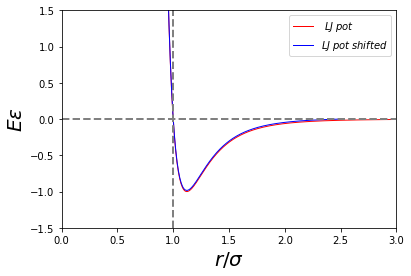

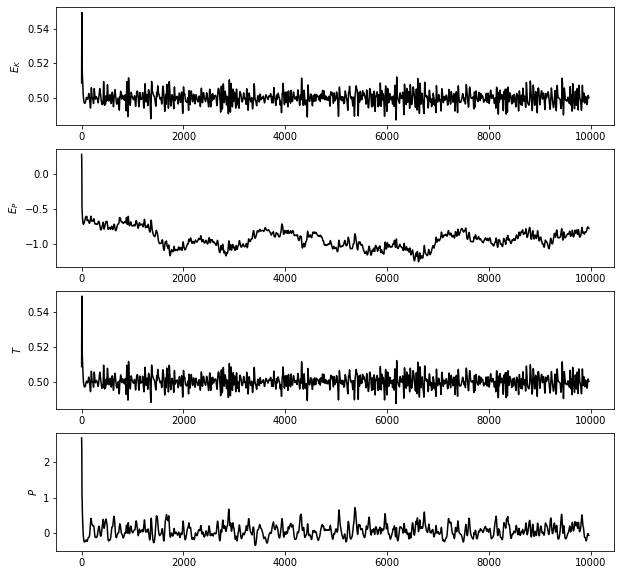

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0.01, 3.0, 500) # Make a radius vector
epsilon = 1 # Energy minimum
sigma = 1   # Distance to zero crossing point
E_LJ = 4*epsilon*((sigma/r)**12-(sigma/r)**6) # Lennard-Jones potential

# The cutoff and shifting value
Rcutoff = 2.5
phicutoff = 4.0/(Rcutoff**12)-4.0/(Rcutoff**6) # Shifts the potential so at the cutoff the potential goes to zero
E_LJ_shift = E_LJ - phicutoff # Subtract the value of the potential at r=2.5

# make a plot of the LJ potential
plt.figure(1)
plt.plot(r, E_LJ, 'r-', linewidth=1, label=r" $LJ\; pot$")
plt.plot(r[:415], E_LJ_shift[:415], 'b-', linewidth=1, label=r"$LJ\; pot\; shifted$") # Blue line is shifted
plt.xlim([0.0,3.0])
plt.ylim([-1.5,1.5])
plt.ylabel(r"$E \epsilon$", fontsize=20)
plt.xlabel(r"$r/\sigma$", fontsize=20)
plt.legend(frameon=False, fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.axvline(1, color='grey',linestyle='--',linewidth=2)
plt.legend()
plt.draw()

def Compute_Forces(pos,acc,ene_pot,epsilon,BoxSize,DIM,N):
    # Compute forces on positions using the Lennard-Jones potential
    # Uses double nested loop which is slow O(N^2) time unsuitable for large systems
    Sij = np.zeros(DIM) # Box scaled units
    Rij = np.zeros(DIM) # Real space units
    
    #Set all variables to zero
    ene_pot = ene_pot*0.0
    acc = acc*0.0
    virial=0.0
    
    # Loop over all pairs of particles
    for i in range(N-1):
        for j in range(i+1,N): #i+1 to N ensures we do not double count
            Sij = pos[i,:]-pos[j,:] # Distance in box scaled units
            for l in range(DIM): # Periodic interactions
                if (np.abs(Sij[l])>0.5):
                    Sij[l] = Sij[l] - np.copysign(1.0,Sij[l]) # If distance is greater than 0.5  (scaled units) then subtract 0.5 to find periodic interaction distance.
            
            Rij = BoxSize*Sij # Scale the box to the real units in this case reduced LJ units
            Rsqij = np.dot(Rij,Rij) # Calculate the square of the distance
            
            if(Rsqij < Rcutoff**2):
                # Calculate LJ potential inside cutoff
                # We calculate parts of the LJ potential at a time to improve the efficieny of the computation (most important for compiled code)
                rm2 = 1.0/Rsqij # 1/r^2
                rm6 = rm2**3.0 # 1/r^6
                rm12 = rm6**2.0 # 1/r^12
                phi = epsilon*(4.0*(rm12-rm6)-phicutoff) # 4[1/r^12 - 1/r^6] - phi(Rc) - we are using the shifted LJ potential
                # The following is dphi = -(1/r)(dV/dr)
                dphi = epsilon*24.0*rm2*(2.0*rm12-rm6) # 24[2/r^14 - 1/r^8]
                ene_pot[i] = ene_pot[i]+0.5*phi # Accumulate energy
                ene_pot[j] = ene_pot[j]+0.5*phi # Accumulate energy
                virial = virial - dphi*Rsqij # Virial is needed to calculate the pressure
                acc[i,:] = acc[i,:]+dphi*Sij # Accumulate forces
                acc[j,:] = acc[j,:]-dphi*Sij # (Fji=-Fij)
    return acc, np.sum(ene_pot)/N, -virial/DIM # return the acceleration vector, potential energy and virial coefficient

def Calculate_Temperature(vel,BoxSize,DIM,N):
    ene_kin = 0.0
    for i in range(N):
        real_vel = BoxSize*vel[i,:]
        ene_kin = ene_kin + 0.5*np.dot(real_vel,real_vel)
    
    ene_kin_aver = 1.0*ene_kin/N
    temperature = 2.0*ene_kin_aver/DIM
    
    return ene_kin_aver,temperature

DIM = 2 # Dimensions
N = 32  # Num of particles to simulate
BoxSize = 10.0   # the size of box
volume  = BoxSize**DIM
density = N / volume
print("volume = ", volume, " density = ", density)

# assign particle initial positions
pos = np.zeros([N, DIM])
pos = 10*(np.random.rand(N, DIM)-0.5)  # randomly assign particle positions
pos = pos[:,:DIM]/BoxSize

MassCentre = np.sum(pos, axis=0)/N
for i in range(DIM):
    pos[:,i] = pos[:,i]-MassCentre[i]

NSteps = 10000 # Number of steps
deltat = 0.0032 # Time step in reduced time units
TRequested = 0.5# #Reduced temperature
DumpFreq = 100 # Save the position to file every DumpFreq steps
epsilon = 1.0 # LJ parameter for the energy between particles

# Main MD loop
def main(pos, NSteps, deltat, TRequested, DumpFreq, epsilon, BoxSize, DIM):
    # Vectors to store parameter values at each step
    N = np.size(pos[:,1])
    ene_kin_aver = np.ones(NSteps)
    ene_pot_aver = np.ones(NSteps)
    temperature = np.ones(NSteps)
    virial = np.ones(NSteps)
    pressure = np.ones(NSteps)
    ene_pot = np.ones(N)

    vel = (np.random.randn(N,DIM)-0.5)
    acc = (np.random.randn(N,DIM)-0.5)
   
    for k in range(NSteps):
        if(k%500==0):
            print("Step: ", k)

        # Refold positions according to periodic boundary conditions
        for i in range(DIM):
            period = np.where(pos[:,i] > 0.5)
            pos[period,i]=pos[period,i]-1.0
            period = np.where(pos[:,i] < -0.5)
            pos[period,i]=pos[period,i]+1.0

        # r(t+dt) modify positions according to velocity and acceleration
        pos = pos + deltat*vel + 0.5*(deltat**2.0)*acc # Step 1

        # Calculate temperature
        ene_kin_aver[k],temperature[k] = Calculate_Temperature(vel, BoxSize, DIM, N)

        # Rescale velocities and take half step
        chi = np.sqrt(TRequested/temperature[k])
        vel = chi*vel + 0.5*deltat*acc # v(t+dt/2) Step 2

        # Compute forces a(t+dt),ene_pot,virial
        acc, ene_pot_aver[k], virial[k] = Compute_Forces(pos,acc,ene_pot,epsilon,BoxSize,DIM,N) # Step 3

        # Complete the velocity step 
        vel = vel + 0.5*deltat*acc # v(t+dt/2) Step 4

        # Calculate temperature
        ene_kin_aver[k],temperature[k] = Calculate_Temperature(vel,BoxSize,DIM,N)

        # Calculate pressure
        pressure[k]= density*temperature[k] + virial[k]/volume
           
    return ene_kin_aver, ene_pot_aver, temperature, pressure, pos

#
# main code
#    
ene_kin_aver, ene_pot_aver, temperature, pressure, pos = main(pos,NSteps,deltat,TRequested,DumpFreq,epsilon,BoxSize,DIM)
# remove runs with numerical instability, only find steps with temperature below 0.55
ind = np.where(np.abs(temperature) < 0.55)
print("Temperature = ", np.average(temperature[ind]), "+-", 2*np.std(temperature[ind]))
print("Pressure = ", np.average(pressure[ind]), "+-", 2*np.std(pressure[ind]))

plt.figure(2, figsize=(10,10))
plt.subplot(4, 1, 1)
plt.plot(ene_kin_aver[ind],'k-')
plt.ylabel("$E_K$")
plt.subplot(4, 1, 2)
plt.plot(ene_pot_aver[ind],'k-')
plt.ylabel("$E_{P}$")
plt.subplot(4, 1, 3)
plt.plot(temperature[ind],'k-')
plt.ylabel("$T$")
plt.subplot(4, 1, 4)
plt.plot(pressure[ind],'k-')
plt.ylabel("$P$")
plt.show()